In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
%matplotlib inline

#Model packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import itertools

#evaluation
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict,cross_validate
from sklearn.metrics import confusion_matrix
from collections import OrderedDict

# Data

In [2]:
non_text_data = pd.read_csv('tree_file.csv', sep='\t',index_col=0) #tree-based feature selection
#uncomment to run pca file
# non_text_data = pd.read_csv('pca_file.csv', sep='\t',index_col=0) 
text_data_train = pd.read_csv('text2vector_train.csv', sep='\t',index_col=0) 
text_data_test = pd.read_csv('text2vector_test.csv', sep='\t',index_col=0) 

In [3]:
X_train1, X_test1, Y_train, Y_test = train_test_split(non_text_data.drop(['Y'], axis=1), 
                                                        non_text_data['Y'], test_size=0.25, random_state=99)

In [4]:
X_train = pd.concat([X_train1,text_data_train],axis=1)
X_train.head()

,host_response_time,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,60,61,62,63,64,65,66,67,68,69
26193,0.0,0.0,1.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.156189,1.094441,...,-0.043889,-0.082634,-0.093989,-0.154559,0.091616,-0.022424,-0.048854,0.003206,0.054959,-0.059272
10998,2.0,1.0,1.0,1,-0.508556,-0.314036,-1.556803,-0.558879,0.533923,-0.910191,...,0.002816,0.072648,-0.024885,-0.084644,0.060078,0.066930,-0.039687,0.261354,-0.032923,-0.093302
29584,0.0,1.0,1.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.068162,-0.910191,...,-0.043719,-0.073360,-0.072177,0.014695,-0.040280,0.000159,-0.032741,-0.019654,0.026979,-0.011889
29442,0.0,0.0,0.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.264971,-0.910191,...,0.098745,-0.113935,0.057945,0.010593,-0.122805,-0.056536,-0.010715,-0.012075,-0.012964,0.069464
48332,1.0,0.0,0.0,1,0.528404,-0.314036,-0.242912,-0.558879,-0.264971,-0.910191,...,0.159702,0.112439,0.029813,-0.228568,0.154774,-0.075447,0.316481,0.418297,0.691055,-0.032692


In [5]:
X_test = pd.concat([X_test1, text_data_test],axis=1)
X_test.head()

,host_response_time,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,60,61,62,63,64,65,66,67,68,69
3676,0.0,0.0,1.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.388298,1.105465,...,-0.033575,-0.053245,-0.202839,-0.050026,0.048597,0.000166,-0.124748,0.042729,-0.069778,-0.049541
10744,0.0,0.0,1.0,1,-0.508556,-0.314036,-0.242912,0.311647,-0.401587,-0.910191,...,-0.044006,-0.060294,-0.072428,0.082123,0.087738,-0.104362,-0.121802,-0.037790,-0.019375,-0.031055
28254,0.0,0.0,0.0,1,0.009924,-0.314036,-1.556803,-0.558879,0.576667,1.063553,...,0.021921,-0.038554,-0.022081,-0.072287,-0.048119,-0.052407,0.207023,0.081178,0.036279,0.202505
32964,1.0,0.0,0.0,1,2.083843,1.986383,1.070978,0.311647,0.875414,-0.910191,...,-0.010084,-0.116534,-0.073716,-0.236091,0.341899,-0.250675,-0.155973,0.320610,0.160959,0.266897
32444,0.0,0.0,0.0,1,-0.508556,1.986383,-0.242912,-0.558879,-0.264971,-0.910191,...,0.013676,0.002561,0.007144,0.077906,-0.056954,0.169201,0.122885,-0.313038,0.093975,0.076785


# Evaluation Metric
--------
- Confusion Matrix
- Learning Curve
- Cross Validation
- Hyperparameters Tuning Graph

confusion matrix

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=3)
    plt.figure(figsize = (5,5))
    
    acc = np.diag(cm).sum() / float(cm.sum())
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('{},Acc={}'.format(title, acc))
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

In [7]:
def plot_confusion_matrix_holdout(title,X,Y,model):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=88)
    model.fit(X_train,Y_train)
    preds = model.predict(X_val)
    plot_confusion_matrix(confusion_matrix(Y_val, preds, labels=range(3)), 
                          classes=range(3), normalize=True,
                          title=title)

confusion matrix by cross validation

In [8]:
def plot_confusion_matrix_cv(title,X,Y,model):
    y_pred = cross_val_predict(model,X,Y, cv=10)
    conf_mat = confusion_matrix(Y, y_pred)
    plot_confusion_matrix(conf_mat, classes=range(3), normalize=True,
                          title=title)

learning curve

In [9]:
def plot_learning_curve(title,estimator,X,Y,train_sizes = np.linspace(.1, 1.0, 5)):
    
#     cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, 
                                                            cv=10, 
                                                            scoring='accuracy',
                                                            n_jobs = -1,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Tuning

In [10]:
def param_tuning(param,param_lst,model_lst,title):
#     cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    train_scores = []
    test_scores = []
    train_stds = []
    test_stds = []
    n_th = 0
    
    for model in model_lst:
        n_th +=1
        print('training model'+str(n_th)+'...')
        cv_results = cross_validate(model, X_train, Y_train, cv=10,
                                   return_train_score=True)
        train_scores_mean = np.mean(cv_results['train_score'])
        train_scores_std = np.std(cv_results['train_score'])
        test_scores_mean = np.mean(cv_results['test_score'])
        test_scores_std = np.std(cv_results['test_score'])
        
        train_scores.append(train_scores_mean)
        test_scores.append(test_scores_mean)
        train_stds.append(train_scores_std)
        test_stds.append(test_scores_std)
        
    plt.figure()
    plt.title(title)
    plt.xlabel(param)
    plt.ylabel("Score")
    plt.grid()
    

    plt.fill_between(param_lst, np.array(train_scores) - np.array(train_stds),
                     np.array(train_scores) + np.array(train_stds), alpha=0.1,
                     color="r")
    plt.fill_between(param_lst, np.array(test_scores) - np.array(test_stds),
                     np.array(test_scores) + np.array(test_stds), alpha=0.1,
                     color="g")

    plt.plot(param_lst, train_scores, 'o-', color="r",
             label="Training score")
    plt.plot(param_lst, test_scores, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

cross validation scores

In [11]:
def cv_score(model):
#     cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    cv_results = cross_validate(model, X_train, Y_train, cv=10,
                                   return_train_score=True)
    train_scores_mean = np.mean(cv_results['train_score'])
    train_scores_std = np.std(cv_results['train_score'])
    test_scores_mean = np.mean(cv_results['test_score'])
    test_scores_std = np.std(cv_results['test_score'])
    print('training score: ', train_scores_mean)
    print('cv score: ', test_scores_mean)
    plt.xlabel("Fold")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(cv_results['train_score'],label="Training")
    plt.plot(cv_results['test_score'],label="CV Score")
    plt.legend()
    plt.show()

# Models

### NB (baseline)

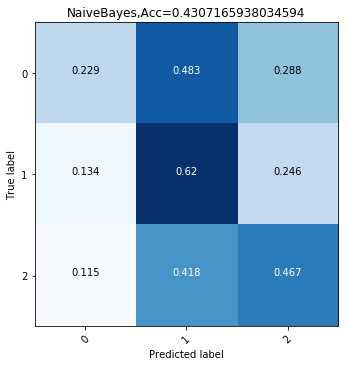

In [14]:
plot_confusion_matrix_holdout('NaiveBayes',X_train,Y_train, GaussianNB())

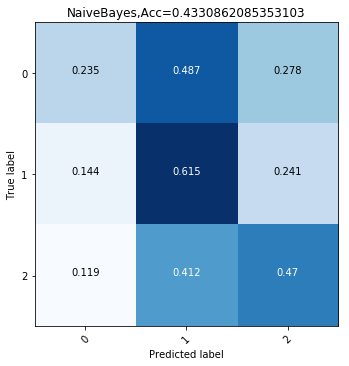

In [30]:
plot_confusion_matrix_cv('NaiveBayes',X_train,Y_train, GaussianNB())

### 1. Logistic Regression

training model1...
training model2...
training model3...
training model4...
training model5...
training model6...
training model7...
training model8...


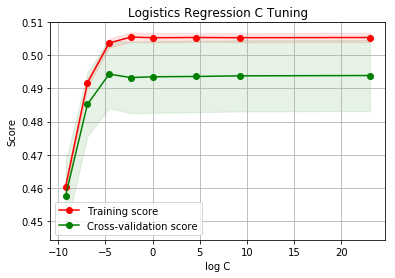

In [24]:
lr_list = []
c_s = [0.0001,0.001,0.01,0.1,1,100,10000,1e+10]
for c in c_s:
    lr_list.append(LogisticRegression(C=c,random_state=0,
                                     solver='lbfgs',multi_class= 'multinomial'))
param_tuning('log C',np.log(c_s),lr_list,'Logistics Regression C Tuning')
plt.show()

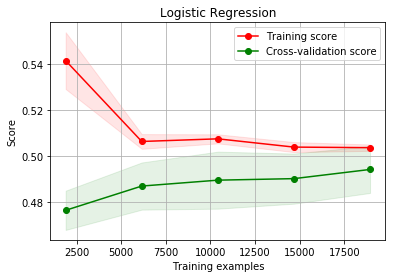

In [25]:
plot_learning_curve('Logistic Regression',
                    LogisticRegression(C=0.01,random_state=0,
                                      solver='lbfgs',multi_class= 'multinomial'),
                    X_train,Y_train)
plt.show()

different solver

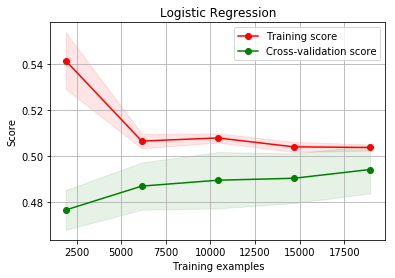

In [19]:
plot_learning_curve('Logistic Regression',
                    LogisticRegression(C=0.01,random_state=0,solver='saga',
                                       multi_class ='multinomial',max_iter = 300),
                    X_train,Y_train)
plt.show()

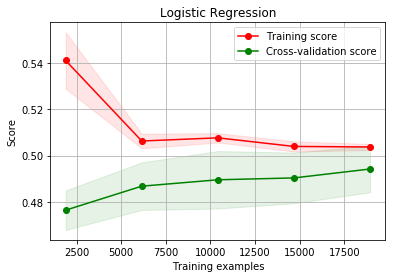

In [20]:
plot_learning_curve('Logistic Regression',
                    LogisticRegression(C=0.01,random_state=0,solver='sag',
                                       multi_class ='multinomial',max_iter = 300),
                    X_train,Y_train)
plt.show()

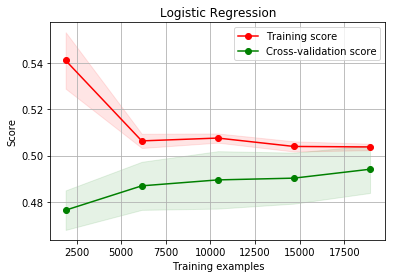

In [21]:
plot_learning_curve('Logistic Regression',
                    LogisticRegression(C=0.01,random_state=0,solver='newton-cg',
                                       multi_class ='multinomial',max_iter = 300),
                    X_train,Y_train)
plt.show()

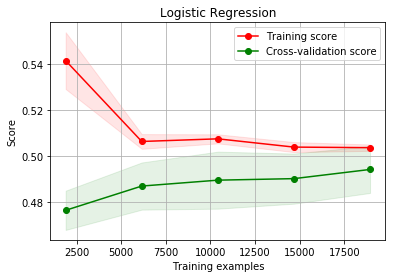

In [22]:
plot_learning_curve('Logistic Regression',
                    LogisticRegression(C=0.01,random_state=0,solver='lbfgs',
                                       multi_class ='multinomial',max_iter = 300),
                    X_train,Y_train)
plt.show()

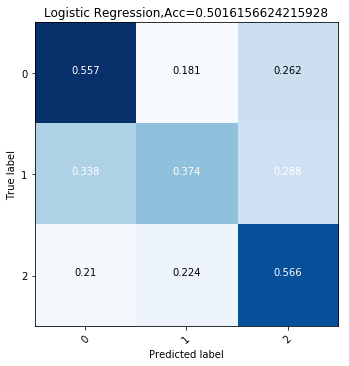

In [26]:
def lr(X,Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=88)
    model = LogisticRegression(C=0.01,random_state=0,
                                      solver='lbfgs',multi_class= 'multinomial')
    model.fit(X_train,Y_train)
    preds = model.predict(X_val)
    plot_confusion_matrix(confusion_matrix(Y_val, preds, labels=range(3)), 
                          classes=range(3), normalize=True,
                          title='Logistic Regression')
    plt.show()

lr(X_train,Y_train)

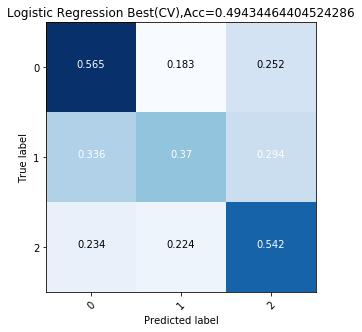

In [15]:
plot_confusion_matrix_cv('Logistic Regression Best(CV)',X_train, Y_train,
                      LogisticRegression(C=0.01,random_state=0,
                                      solver='lbfgs',multi_class= 'multinomial'))

### 2. Decision Tree

In [ ]:
DecisionTreeClassifier(criterion = 'gini',splitter='best',
                      max_depth=None, min_samples_split=2000,min_samples_leaf=1000,
                      random_state=0)

#### 1) min_samples_split

<module 'matplotlib.pyplot' from '/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

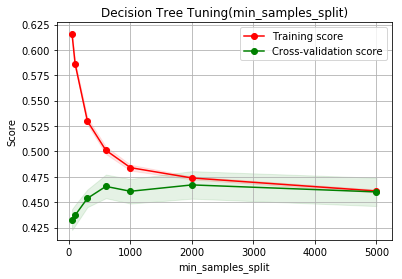

In [14]:
min_splits = [50, 100,300,600,1000,2000,5000]
dt_lst = []
for s in min_splits:
    dt_lst.append(DecisionTreeClassifier(random_state=0, min_samples_split = s, min_samples_leaf= 30))

param_tuning('min_samples_split',min_splits,dt_lst,'Decision Tree Tuning(min_samples_split)')

training score:  0.47389348389460545
cv score:  0.4670670922719936


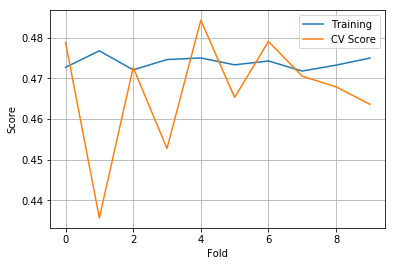

In [15]:
cv_score(DecisionTreeClassifier(random_state=0, min_samples_split = 2000, min_samples_leaf= 30))

training score:  0.5011723296483253
cv score:  0.4655931664131628


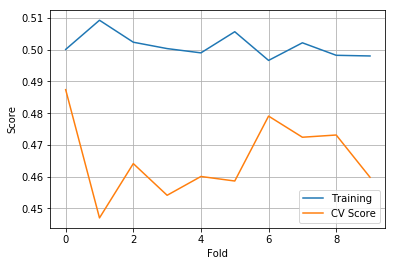

In [16]:
cv_score(DecisionTreeClassifier(random_state=0, min_samples_split = 600, min_samples_leaf= 30))

#### 2) min_samples_leaf

<module 'matplotlib.pyplot' from '/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

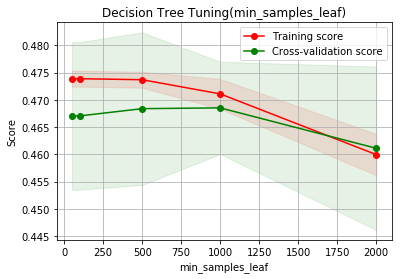

In [17]:
min_leafs = [50,100, 500,1000,2000]
dt_lst_leaf = []
for leaf in min_leafs:
    dt_lst_leaf.append(DecisionTreeClassifier(random_state=0, min_samples_split = 2000,
                                              min_samples_leaf= leaf))

param_tuning('min_samples_leaf',min_leafs,dt_lst_leaf,'Decision Tree Tuning(min_samples_leaf)')

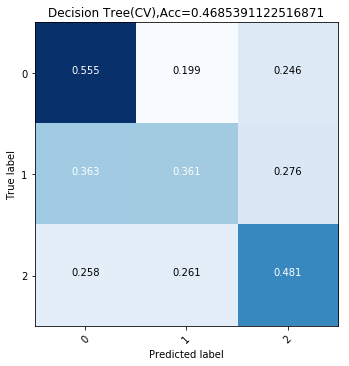

In [35]:
#Best Model
plot_confusion_matrix_cv('Decision Tree(CV)',X_train, Y_train,
                      DecisionTreeClassifier(criterion = 'gini',splitter='best',
                      max_depth=None, min_samples_split=2000,min_samples_leaf=1000,
                      random_state=0))

#### criterion

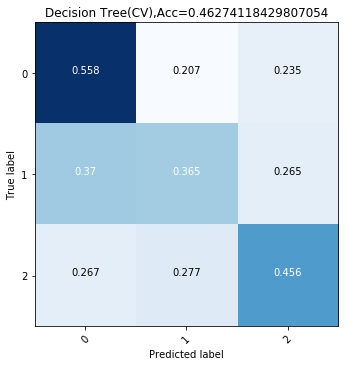

In [36]:
plot_confusion_matrix_cv('Decision Tree(CV)',X_train, Y_train,
                      DecisionTreeClassifier(criterion = 'entropy',splitter='best',
                      max_depth=None, min_samples_split=2000,min_samples_leaf=1000,
                      random_state=0))

#### splitter

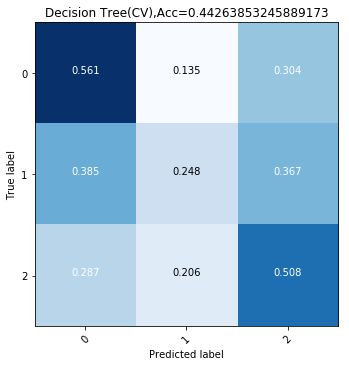

In [40]:
plot_confusion_matrix_cv('Decision Tree(CV)',X_train, Y_train,
                      DecisionTreeClassifier(criterion = 'gini',splitter='random',
                      max_depth=None, min_samples_split=2000,min_samples_leaf=1000,
                      random_state=0))

#### max_depth = 6

training model1...
training model2...
training model3...
training model4...
training model5...
training model6...
training model7...
training model8...
training model9...


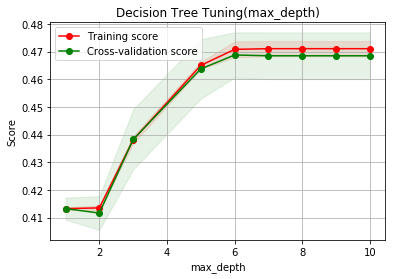

In [46]:
max_depths = [1,2,3,5,6,7,8,9,10]
dt_lst_depth = []
for d in max_depths:
    dt_lst_depth.append(DecisionTreeClassifier(random_state=0, min_samples_split = 2000,
                                              min_samples_leaf= 1000,
                                             max_depth = d))

param_tuning('max_depth',max_depths,dt_lst_depth,'Decision Tree Tuning(max_depth)')
plt.show()

### 3. Random Forest

#### max_depth = 5

training model1...
training model2...
training model3...
training model4...
training model5...
training model6...
training model7...
training model8...
training model9...
training model10...
training model11...
training model12...
training model13...


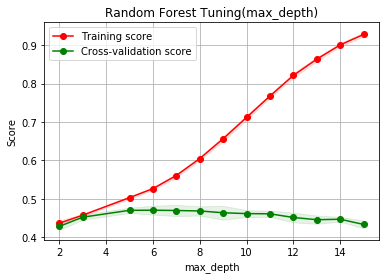

In [53]:
max_depths = [2,3,5,6,7,8,9,10,11,12,13,14,15]
dt_lst_depth = []
for d in max_depths:
    dt_lst_depth.append(RandomForestClassifier(random_state=0,n_estimators=1500,
                                               min_samples_split = 10,min_samples_leaf=10,
                                               max_depth = d))

param_tuning('max_depth',max_depths,dt_lst_depth,'Random Forest Tuning(max_depth)')
plt.show()

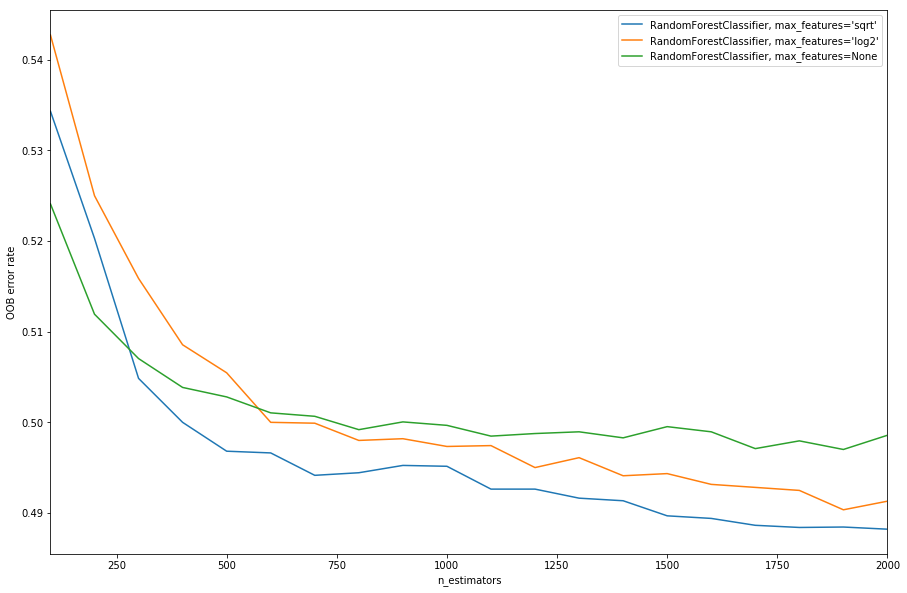

In [96]:
from collections import OrderedDict

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,n_jobs = -1,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=0)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,n_jobs = -1,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=0)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,n_jobs = -1,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# # Range of `n_estimators` values to explore.
# min_estimators = 300
# max_estimators = 175

for label, clf in ensemble_clfs:
    for i in np.linspace(100,2000,20):
        clf.set_params(n_estimators=int(i))
        clf.fit(X_train, Y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

plt.figure(figsize=(15,10))
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(100,2000)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### n_estimators = 1500

<module 'matplotlib.pyplot' from '/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

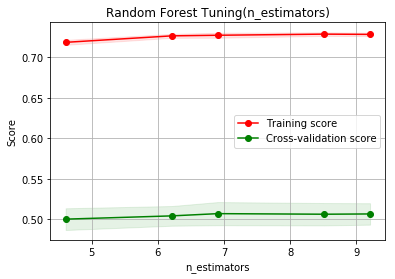

In [11]:
estimators = [100,500,1000,5000,10000]
rf_lst_estimators = []
for e in estimators:
    rf_lst_estimators.append(RandomForestClassifier(n_estimators=e, min_samples_split = 100, 
                                      min_samples_leaf = 10, random_state=0))
    
param_tuning('n_estimators',np.log(estimators),rf_lst_estimators,'Random Forest Tuning(n_estimators)')

In [ ]:
plot_confusion_matrix_cv('Decision Tree(CV)',X_train, Y_train,
                         RandomForestClassifier(n_estimators=e, min_samples_split = 100, 
                                      min_samples_leaf = 10, random_state=0))

#### min_samples_leaf = 300

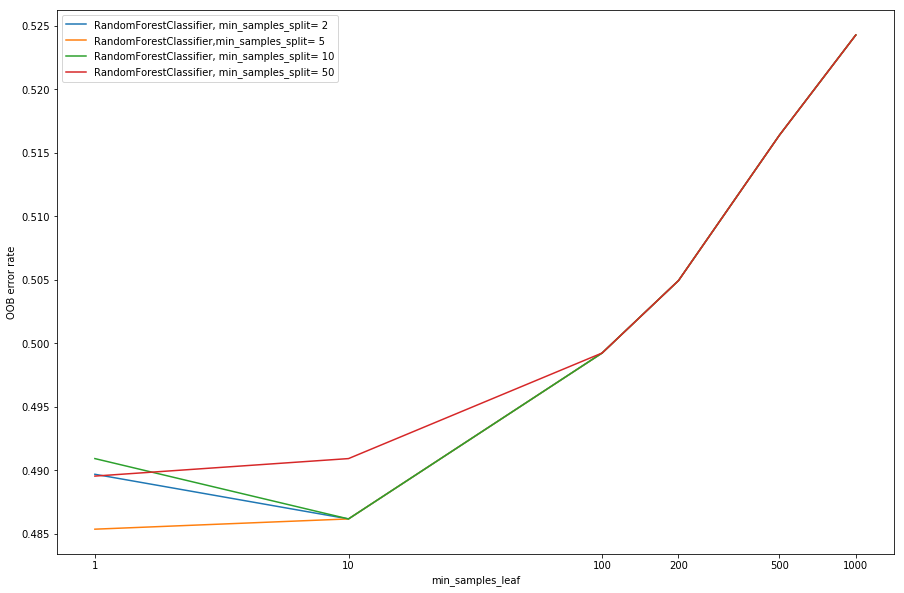

In [119]:
sample_leaf_options = [1,10,100,200,500,1000]
# sample_split_options = [2,5,10,50,100,200,500]
from collections import OrderedDict

ensemble_clfs = [
    ("RandomForestClassifier, min_samples_split= 2",
        RandomForestClassifier(n_estimators=1500,n_jobs = -1, oob_score=True,
                               max_features="sqrt",
                               min_samples_split=2,min_samples_leaf = 100,
                               random_state=0)),
    ("RandomForestClassifier,min_samples_split= 5",
        RandomForestClassifier(n_estimators=1500,n_jobs = -1,
                               oob_score=True,
                               max_features="sqrt",
                               min_samples_split=5, min_samples_leaf = 100,
                               random_state=0)),
    ("RandomForestClassifier, min_samples_split= 10",
        RandomForestClassifier(n_estimators=1500,n_jobs = -1,
                               oob_score=True,
                               max_features="sqrt",
                               min_samples_split=10, min_samples_leaf = 100,
                               random_state=0)),
    ("RandomForestClassifier, min_samples_split= 50",
        RandomForestClassifier(n_estimators=1500,n_jobs = -1,
                               oob_score=True,
                               max_features="sqrt",
                               min_samples_split=50, min_samples_leaf = 100,
                               random_state=0))
]

# Map a classifier name to a list of (<min_samples_leaf>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(len(sample_leaf_options)):
        clf.set_params(min_samples_leaf = sample_leaf_options[i])
        clf.fit(X_train, Y_train)

        # Record the OOB error for each `min_samples_leaf` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((sample_leaf_options[i], oob_error))


plt.figure(figsize=(15,10))
# Generate the "OOB error rate" vs. "min_samples_leaf" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(np.log(xs), ys, label=label)

plt.xticks(np.log([1,10,100,200,500,1000]),[1,10,100,200,500,1000])
plt.xlabel("min_samples_leaf")
plt.ylabel("OOB error rate")
plt.legend(loc="best")
plt.show()

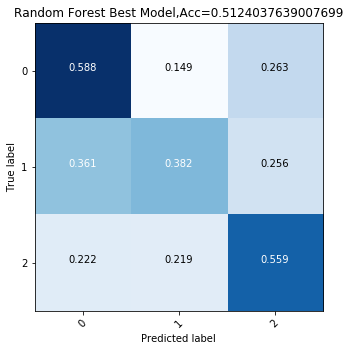

In [120]:
plot_confusion_matrix_cv('Random Forest Best Model',X_train, Y_train, 
                         RandomForestClassifier(n_estimators=1500, min_samples_split = 10, 
                                                min_samples_leaf = 10, random_state=0,
                                                max_features="sqrt",
                                                n_jobs=-1))

In [71]:
%timeit RandomForestClassifier(n_estimators=1500, min_samples_split = 10, min_samples_leaf = 10, random_state=0,max_features="sqrt",n_jobs=-1).fit(X_train,Y_train)

24.1 s ± 692 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<module 'matplotlib.pyplot' from '/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

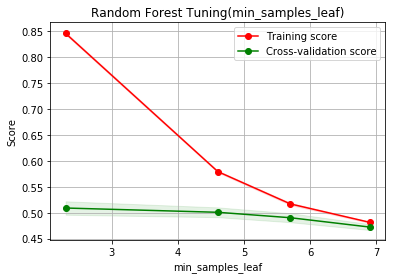

In [16]:
min_leafs = [10,100,300,1000]
rf_lst_leafs = []
for l in min_leafs:
    rf_lst_leafs.append(RandomForestClassifier(n_estimators=500, min_samples_split = 50, 
                                      min_samples_leaf = l, random_state=0))
    
param_tuning('min_samples_leaf',np.log(min_leafs),rf_lst_leafs,'Random Forest Tuning(min_samples_leaf)')

#### min_samples_split = 

### 3. Extra Tree

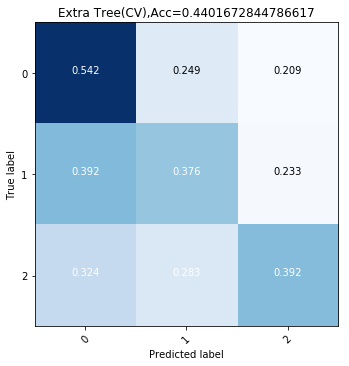

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
plot_confusion_matrix_cv('Extra Tree(CV)',X_train, Y_train,
                      ExtraTreesClassifier(random_state=0))

#### n_estimators = 1200

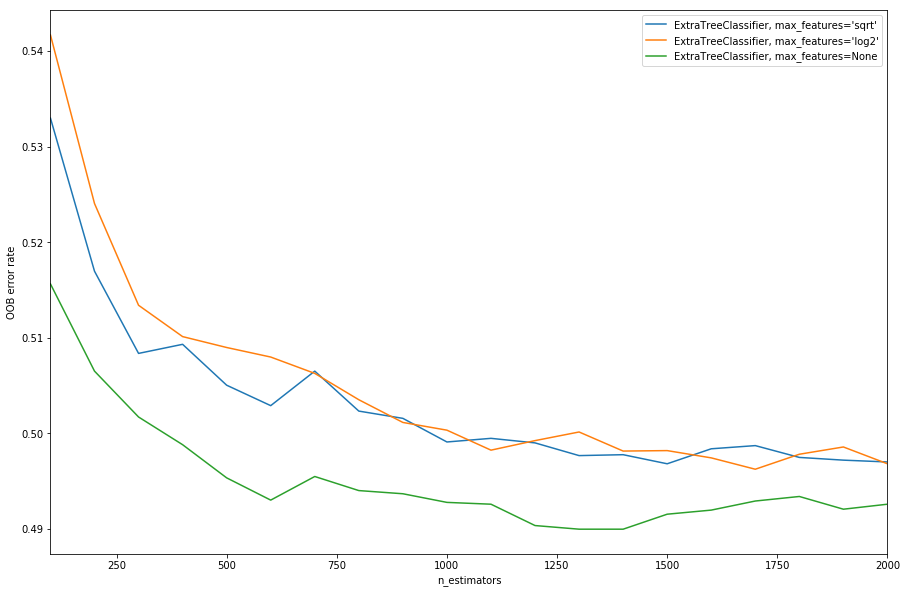

In [124]:
from collections import OrderedDict

ensemble_clfs = [
    ("ExtraTreeClassifier, max_features='sqrt'",
        ExtraTreesClassifier(n_estimators=100,n_jobs = -1,
                             bootstrap=True,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=0)),
    ("ExtraTreeClassifier, max_features='log2'",
        ExtraTreesClassifier(n_estimators=100,n_jobs = -1,
                             bootstrap=True,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=0)),
    ("ExtraTreeClassifier, max_features=None",
        ExtraTreesClassifier(n_estimators=100,n_jobs = -1,
                             bootstrap=True,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# # Range of `n_estimators` values to explore.
# min_estimators = 300
# max_estimators = 175

for label, clf in ensemble_clfs:
    for i in np.linspace(100,2000,20):
        clf.set_params(n_estimators=int(i))
        clf.fit(X_train, Y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

plt.figure(figsize=(15,10))
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(100,2000)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [126]:
np.linspace(100,2000,20)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800.,
       1900., 2000.])

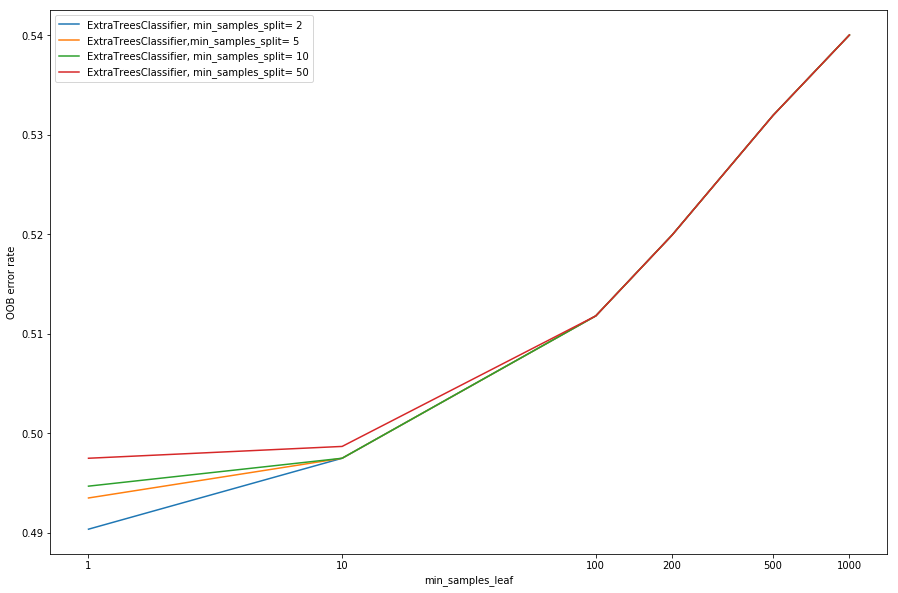

In [129]:
sample_leaf_options = [1,10,100,200,500,1000]
# sample_split_options = [2,5,10,50]
from collections import OrderedDict

ensemble_clfs = [
    ("ExtraTreesClassifier, min_samples_split= 2",
        ExtraTreesClassifier(n_estimators=1200,n_jobs = -1, oob_score=True,
                            max_features= None,
                             bootstrap=True,
                               min_samples_split=2,min_samples_leaf = 100,
                               random_state=0)),
    ("ExtraTreesClassifier,min_samples_split= 5",
        ExtraTreesClassifier(n_estimators=1200,n_jobs = -1,
                               oob_score=True,bootstrap=True,
                               max_features=None,
                               min_samples_split=5, min_samples_leaf = 100,
                               random_state=0)),
    ("ExtraTreesClassifier, min_samples_split= 10",
        ExtraTreesClassifier(n_estimators=1200,n_jobs = -1,
                               oob_score=True,bootstrap=True,
                               max_features=None,
                               min_samples_split=10, min_samples_leaf = 100,
                               random_state=0)),
    ("ExtraTreesClassifier, min_samples_split= 50",
        ExtraTreesClassifier(n_estimators=1200,n_jobs = -1,
                               oob_score=True,bootstrap=True,
                               max_features=None,
                               min_samples_split=50, min_samples_leaf = 100,
                               random_state=0))
]

# Map a classifier name to a list of (<min_samples_leaf>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(len(sample_leaf_options)):
        clf.set_params(min_samples_leaf = sample_leaf_options[i])
        clf.fit(X_train, Y_train)

        # Record the OOB error for each `min_samples_leaf` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((sample_leaf_options[i], oob_error))

plt.figure(figsize=(15,10))
# Generate the "OOB error rate" vs. "min_samples_leaf" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(np.log(xs), ys, label=label)

plt.xticks(np.log([1,10,100,200,500,1000]),[1,10,100,200,500,1000])
plt.xlabel("min_samples_leaf")
plt.ylabel("OOB error rate")
plt.legend(loc="best")
plt.show()

In [ ]:
plot_confusion_matrix_cv('ExtraTreesClassifier Best Model',X_train, Y_train, 
                         RandomForestClassifier(n_estimators=1200, min_samples_split = 2, 
                                                min_samples_leaf = 1, random_state=0,
                                                max_features=None,bootstrap=True,
                                                n_jobs=-1))

### 4. Gradient Boost

In [35]:
np.linspace(500,1800,10,dtype=int)

array([ 500,  644,  788,  933, 1077, 1222, 1366, 1511, 1655, 1800])

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=500 .............................
[CV] max_features=sqrt, n_estimators=644 .............................
[CV] max_features=sqrt, n_estimators=644 .............................
[CV]  max_features=sqrt, n_estimators=500, score=0.4969121140142518, total= 1.1min
[C

[CV] max_features=sqrt, n_estimators=1222 ............................


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  8.1min


[CV]  max_features=sqrt, n_estimators=1077, score=0.4969091773656681, total= 2.4min
[CV] max_features=sqrt, n_estimators=1366 ............................
[CV]  max_features=sqrt, n_estimators=1077, score=0.5059438896814075, total= 2.4min
[CV] max_features=sqrt, n_estimators=1366 ............................
[CV]  max_features=sqrt, n_estimators=1222, score=0.5339667458432305, total= 2.8min
[CV] max_features=sqrt, n_estimators=1366 ............................
[CV]  max_features=sqrt, n_estimators=1222, score=0.47030878859857483, total= 2.8min
[CV] max_features=sqrt, n_estimators=1366 ............................
[CV]  max_features=sqrt, n_estimators=1222, score=0.4878859857482185, total= 2.8min
[CV] max_features=sqrt, n_estimators=1366 ............................
[CV]  max_features=sqrt, n_estimators=1222, score=0.5116389548693586, total= 2.8min
[CV] max_features=sqrt, n_estimators=1366 ............................
[CV]  max_features=sqrt, n_estimators=1222, score=0.5004752851711026,

[CV]  max_features=sqrt, n_estimators=1800, score=0.5019011406844106, total= 4.2min
[CV] max_features=log2, n_estimators=644 .............................
[CV] ... max_features=log2, n_estimators=500, score=0.5, total=  49.9s
[CV] max_features=log2, n_estimators=644 .............................
[CV]  max_features=log2, n_estimators=500, score=0.5047528517110266, total=  50.2s
[CV] max_features=log2, n_estimators=644 .............................
[CV]  max_features=log2, n_estimators=500, score=0.5021398002853067, total=  50.1s
[CV] max_features=log2, n_estimators=644 .............................
[CV]  max_features=log2, n_estimators=500, score=0.4997622444127437, total=  50.1s
[CV] max_features=log2, n_estimators=644 .............................
[CV]  max_features=log2, n_estimators=644, score=0.5358669833729216, total= 1.1min
[CV] max_features=log2, n_estimators=644 .............................
[CV]  max_features=log2, n_estimators=644, score=0.47600950118764845, total= 1.1min
[CV

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 27.5min


[CV]  max_features=log2, n_estimators=933, score=0.4983357108892059, total= 1.6min
[CV] max_features=log2, n_estimators=1222 ............................
[CV]  max_features=log2, n_estimators=933, score=0.4973846885401807, total= 1.6min
[CV] max_features=log2, n_estimators=1222 ............................
[CV]  max_features=log2, n_estimators=1077, score=0.5315914489311164, total= 1.9min
[CV] max_features=log2, n_estimators=1222 ............................
[CV]  max_features=log2, n_estimators=1077, score=0.4693586698337292, total= 1.8min
[CV] max_features=log2, n_estimators=1222 ............................
[CV]  max_features=log2, n_estimators=1077, score=0.48693586698337293, total= 1.9min
[CV] max_features=log2, n_estimators=1222 ............................
[CV]  max_features=log2, n_estimators=1077, score=0.5106888361045131, total= 1.9min
[CV] max_features=log2, n_estimators=1222 ............................
[CV]  max_features=log2, n_estimators=1077, score=0.5109315589353612, t

[CV]  max_features=log2, n_estimators=1800, score=0.4679334916864608, total= 3.0min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=log2, n_estimators=1800, score=0.4817102137767221, total= 3.0min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=log2, n_estimators=1800, score=0.5102137767220902, total= 3.0min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=log2, n_estimators=1800, score=0.5009505703422054, total= 3.0min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=log2, n_estimators=1800, score=0.4928707224334601, total= 3.0min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=log2, n_estimators=1800, score=0.49619771863117873, total= 3.0min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=log2, n_estimators=1800, score=0.4928707224334601,

[CV] max_features=None, n_estimators=1222 ............................
[CV]  max_features=None, n_estimators=1077, score=0.4976235741444867, total=19.0min
[CV] max_features=None, n_estimators=1222 ............................
[CV]  max_features=None, n_estimators=1077, score=0.4976235741444867, total=19.2min
[CV] max_features=None, n_estimators=1222 ............................
[CV]  max_features=None, n_estimators=1077, score=0.48906844106463876, total=19.1min
[CV] max_features=None, n_estimators=1222 ............................
[CV]  max_features=None, n_estimators=1077, score=0.4992867332382311, total=19.0min
[CV] max_features=None, n_estimators=1366 ............................
[CV]  max_features=None, n_estimators=1077, score=0.48359486447931527, total=19.1min
[CV] max_features=None, n_estimators=1366 ............................
[CV]  max_features=None, n_estimators=1222, score=0.47363420427553443, total=21.4min
[CV] max_features=None, n_estimators=1366 .........................

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 136.4min


[CV]  max_features=None, n_estimators=1366, score=0.5019011406844106, total=24.1min
[CV] max_features=None, n_estimators=1511 ............................
[CV]  max_features=None, n_estimators=1366, score=0.49667300380228135, total=24.3min
[CV] max_features=None, n_estimators=1511 ............................
[CV]  max_features=None, n_estimators=1366, score=0.4919201520912547, total=24.0min
[CV] max_features=None, n_estimators=1511 ............................
[CV]  max_features=None, n_estimators=1366, score=0.49477186311787075, total=24.2min
[CV] max_features=None, n_estimators=1511 ............................
[CV]  max_features=None, n_estimators=1366, score=0.4983357108892059, total=24.0min
[CV] max_features=None, n_estimators=1655 ............................
[CV]  max_features=None, n_estimators=1366, score=0.4764621968616263, total=24.2min
[CV] max_features=None, n_estimators=1655 ............................
[CV]  max_features=None, n_estimators=1511, score=0.5401425178147269

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 217.5min finished
/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


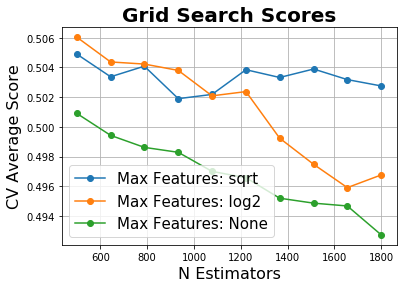

In [36]:
from sklearn.model_selection import GridSearchCV

n_estimators = np.linspace(500,1800,10,dtype=int)
max_features = ['sqrt','log2',None]


gd = GradientBoostingClassifier(warm_start=True, random_state=0)

clf = GridSearchCV(gd,
                   dict(n_estimators = n_estimators, max_features = max_features), 
                   cv=10,
                   n_jobs=-1,
                  scoring='accuracy', verbose=5).fit(X_train,Y_train)


In [37]:
clf.grid_scores_, clf.best_params_, clf.best_score_

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50489, std: 0.00897, params: {'max_features': 'sqrt', 'n_estimators': 500},
  mean: 0.50337, std: 0.01309, params: {'max_features': 'sqrt', 'n_estimators': 644},
  mean: 0.50409, std: 0.01629, params: {'max_features': 'sqrt', 'n_estimators': 788},
  mean: 0.50190, std: 0.01756, params: {'max_features': 'sqrt', 'n_estimators': 933},
  mean: 0.50219, std: 0.01644, params: {'max_features': 'sqrt', 'n_estimators': 1077},
  mean: 0.50385, std: 0.01571, params: {'max_features': 'sqrt', 'n_estimators': 1222},
  mean: 0.50333, std: 0.01479, params: {'max_features': 'sqrt', 'n_estimators': 1366},
  mean: 0.50390, std: 0.01377, params: {'max_features': 'sqrt', 'n_estimators': 1511},
  mean: 0.50318, std: 0.01218, params: {'max_features': 'sqrt', 'n_estimators': 1655},
  mean: 0.50276, std: 0.01298, params: {'max_features': 'sqrt', 'n_estimators': 1800},
  mean: 0.50604, std: 0.01499, params: {'max_features': 'log2', 'n_estimators': 500},
  mean: 0.50437, std: 0.01427, params: {'max_fea

/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


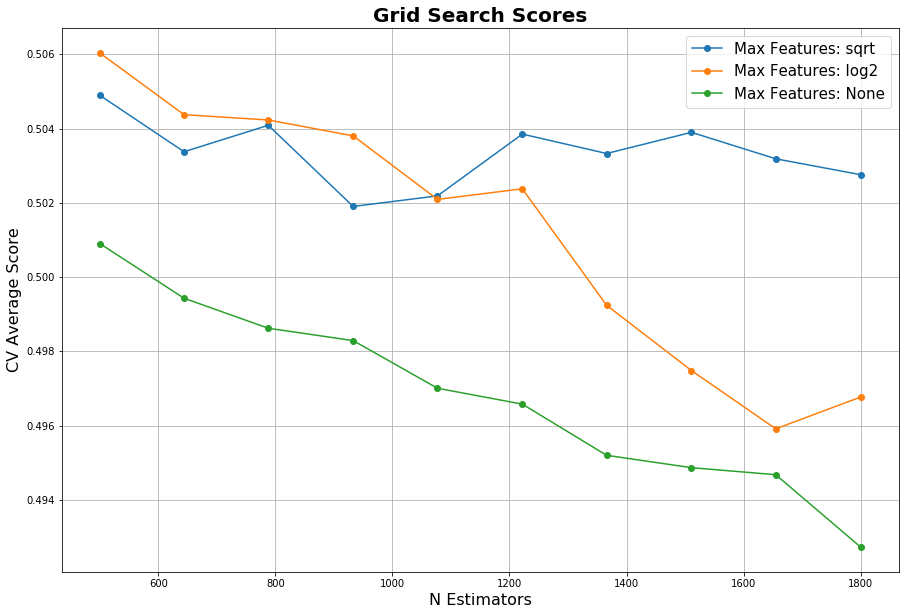

In [38]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1,figsize=(15, 10))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    
# Calling Method 
plot_grid_search(clf.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

In [39]:
np.linspace(100,800,8,dtype=int)

array([100, 200, 300, 400, 500, 600, 700, 800])

In [40]:

n_estimators = np.linspace(100,800,8,dtype=int)
max_features = ['sqrt','log2',None]


gd = GradientBoostingClassifier(warm_start=True, random_state=0)

clf = GridSearchCV(gd,
                   dict(n_estimators = n_estimators, max_features = max_features), 
                   cv=10,
                   n_jobs=-1,
                  scoring='accuracy', verbose=5).fit(X_train,Y_train)



Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=100 .............................
[CV] max_features=sqrt, n_estimators=200 .............................
[CV] max_features=sqrt, n_estimators=200 .............................
[CV]  max_features=sqrt, n_estimators=100, score=0.5311163895486936, total=  13.1s
[C

[CV] max_features=sqrt, n_estimators=600 .............................


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.3min


[CV]  max_features=sqrt, n_estimators=500, score=0.4988112220637185, total= 1.1min
[CV] max_features=sqrt, n_estimators=700 .............................
[CV]  max_features=sqrt, n_estimators=500, score=0.4992867332382311, total= 1.1min
[CV] max_features=sqrt, n_estimators=700 .............................
[CV]  max_features=sqrt, n_estimators=600, score=0.4836104513064133, total= 1.3min
[CV] max_features=sqrt, n_estimators=700 .............................
[CV]  max_features=sqrt, n_estimators=600, score=0.5306413301662708, total= 1.3min
[CV] max_features=sqrt, n_estimators=700 .............................
[CV]  max_features=sqrt, n_estimators=600, score=0.49026128266033253, total= 1.3min
[CV] max_features=sqrt, n_estimators=700 .............................
[CV]  max_features=sqrt, n_estimators=600, score=0.5106888361045131, total= 1.3min
[CV] max_features=sqrt, n_estimators=700 .............................
[CV]  max_features=sqrt, n_estimators=600, score=0.5061787072243346, total=

[CV] max_features=log2, n_estimators=400 .............................
[CV]  max_features=log2, n_estimators=300, score=0.4855106888361045, total=  31.2s
[CV] max_features=log2, n_estimators=400 .............................
[CV]  max_features=log2, n_estimators=300, score=0.5211401425178147, total=  31.0s
[CV] max_features=log2, n_estimators=400 .............................
[CV]  max_features=log2, n_estimators=300, score=0.5152091254752852, total=  31.0s
[CV] max_features=log2, n_estimators=400 .............................
[CV]  max_features=log2, n_estimators=300, score=0.504277566539924, total=  31.1s
[CV] max_features=log2, n_estimators=400 .............................
[CV]  max_features=log2, n_estimators=300, score=0.5004752851711026, total=  31.2s
[CV] max_features=log2, n_estimators=400 .............................
[CV]  max_features=log2, n_estimators=300, score=0.5061787072243346, total=  31.0s
[CV] max_features=log2, n_estimators=400 .............................
[CV]  

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 10.3min


[CV]  max_features=log2, n_estimators=600, score=0.505468378506895, total=  56.8s
[CV] max_features=log2, n_estimators=800 .............................
[CV]  max_features=log2, n_estimators=600, score=0.5040418449833571, total=  56.8s
[CV] max_features=log2, n_estimators=800 .............................
[CV]  max_features=log2, n_estimators=700, score=0.534916864608076, total= 1.1min
[CV] max_features=log2, n_estimators=800 .............................
[CV]  max_features=log2, n_estimators=700, score=0.47410926365795725, total= 1.1min
[CV] max_features=log2, n_estimators=800 .............................
[CV]  max_features=log2, n_estimators=700, score=0.4950118764845606, total= 1.1min
[CV] max_features=log2, n_estimators=800 .............................
[CV]  max_features=log2, n_estimators=700, score=0.5087885985748218, total= 1.1min
[CV] max_features=log2, n_estimators=800 .............................
[CV]  max_features=log2, n_estimators=700, score=0.5128326996197718, total= 1

[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=None, n_estimators=400, score=0.5106888361045131, total= 7.1min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=None, n_estimators=400, score=0.49311163895486937, total= 7.2min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=None, n_estimators=400, score=0.4990494296577947, total= 7.1min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=None, n_estimators=400, score=0.4976235741444867, total= 7.1min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=None, n_estimators=400, score=0.5047528517110266, total= 7.1min
[CV] max_features=None, n_estimators=500 .............................
[CV]  max_features=None, n_estimators=400, score=0.5047528517110266, total= 7.2min
[CV] max_features=None, n_estimators=500 .............................
[CV]

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 67.8min finished


/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


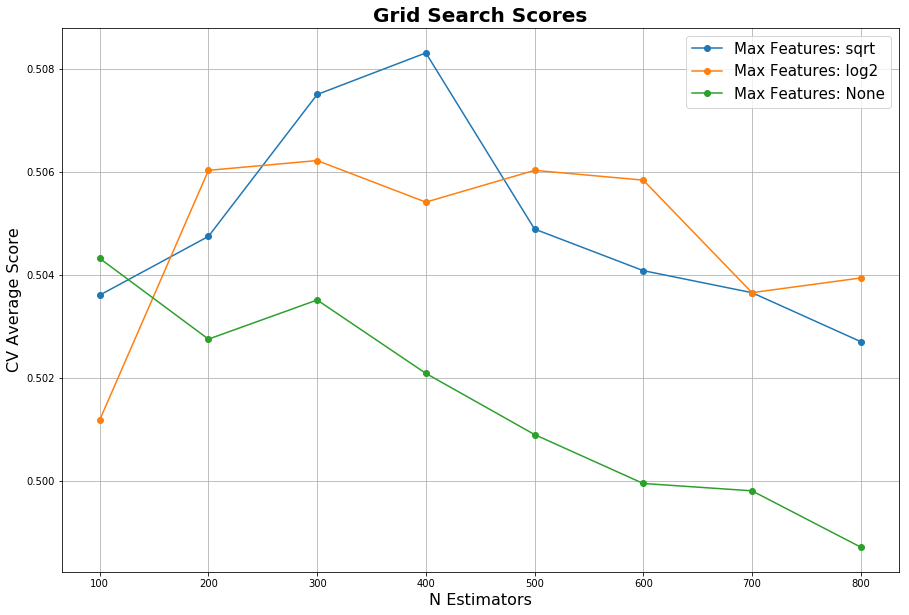

In [41]:
# Calling Method 
plot_grid_search(clf.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

In [42]:
clf.grid_scores_, clf.best_params_, clf.best_score_

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50361, std: 0.01182, params: {'max_features': 'sqrt', 'n_estimators': 100},
  mean: 0.50475, std: 0.01286, params: {'max_features': 'sqrt', 'n_estimators': 200},
  mean: 0.50751, std: 0.01205, params: {'max_features': 'sqrt', 'n_estimators': 300},
  mean: 0.50832, std: 0.01098, params: {'max_features': 'sqrt', 'n_estimators': 400},
  mean: 0.50489, std: 0.00897, params: {'max_features': 'sqrt', 'n_estimators': 500},
  mean: 0.50409, std: 0.01280, params: {'max_features': 'sqrt', 'n_estimators': 600},
  mean: 0.50366, std: 0.01530, params: {'max_features': 'sqrt', 'n_estimators': 700},
  mean: 0.50271, std: 0.01593, params: {'max_features': 'sqrt', 'n_estimators': 800},
  mean: 0.50119, std: 0.00998, params: {'max_features': 'log2', 'n_estimators': 100},
  mean: 0.50604, std: 0.01029, params: {'max_features': 'log2', 'n_estimators': 200},
  mean: 0.50623, std: 0.01269, params: {'max_features': 'log2', 'n_estimators': 300},
  mean: 0.50542, std: 0.01361, params: {'max_features'

#### max_depth = 

training model1...
training model2...
training model3...
training model4...
training model5...


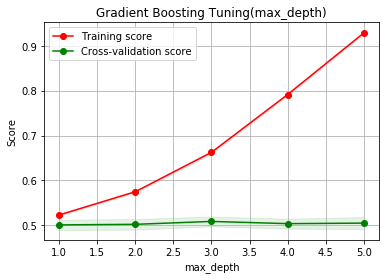

In [55]:
max_depths = [1,2,3,4,5]
dt_lst_depth = []
for d in max_depths:
    dt_lst_depth.append(GradientBoostingClassifier(random_state=0,max_features = 'sqrt',
                                               n_estimators = 400,
                                             max_depth = d))

param_tuning('max_depth',max_depths,dt_lst_depth,'Gradient Boosting Tuning(max_depth)')
plt.show()

In [46]:
gd = GradientBoostingClassifier(random_state=0,max_features = 'sqrt',n_estimators = 400)

clf = GridSearchCV(gd,
                   dict(max_depth = [2,3,4,5,6]), 
                   cv=10,
                   n_jobs=-1,
                  scoring='accuracy', verbose=5).fit(X_train,Y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=2 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] ........... max_depth=2, score=0.49406175771971494, total=  36.1s
[CV] max_depth=3

[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  4.9min remaining:  1.5min


[CV] ............ max_depth=5, score=0.5185361216730038, total= 1.8min
[CV] ............ max_depth=5, score=0.4916785544460295, total= 1.8min
[CV] ............ max_depth=6, score=0.5339667458432305, total= 2.5min
[CV] ........... max_depth=6, score=0.47933491686460805, total= 2.5min
[CV] ........... max_depth=6, score=0.49073634204275535, total= 2.4min
[CV] ............ max_depth=6, score=0.5078384798099762, total= 2.4min
[CV] ............ max_depth=6, score=0.4909695817490494, total= 2.2min
[CV] ............ max_depth=6, score=0.5085551330798479, total= 2.2min
[CV] ............ max_depth=6, score=0.5009505703422054, total= 2.1min
[CV] ............ max_depth=6, score=0.5095057034220533, total= 2.1min
[CV] ............ max_depth=6, score=0.4992867332382311, total= 1.7min
[CV] ............ max_depth=6, score=0.5087969567284831, total= 1.7min


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.6min finished


In [47]:
clf.grid_scores_, clf.best_params_, clf.best_score_

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50185, std: 0.01189, params: {'max_depth': 2},
  mean: 0.50832, std: 0.01098, params: {'max_depth': 3},
  mean: 0.50337, std: 0.01108, params: {'max_depth': 4},
  mean: 0.50456, std: 0.01343, params: {'max_depth': 5},
  mean: 0.50299, std: 0.01401, params: {'max_depth': 6}],
 {'max_depth': 3},
 0.5083166999334664)

#### min_samples_split, min_samples_leaf

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=5 .........................
[CV] min_samples_leaf=1, min_samples_split=5 .........................
[CV]  min_samples_leaf=1, min_samples_split=2, score=0.5339667458432305, total=  52.2

[CV]  min_samples_leaf=1, min_samples_split=100, score=0.5023764258555133, total=  55.5s
[CV]  min_samples_leaf=1, min_samples_split=100, score=0.5133079847908745, total=  55.5s
[CV] min_samples_leaf=1, min_samples_split=200 .......................


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.9min


[CV] min_samples_leaf=1, min_samples_split=200 .......................
[CV]  min_samples_leaf=1, min_samples_split=100, score=0.4945316214931051, total=  55.3s
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.5391923990498813, total=  55.0s
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=100, score=0.5026153114598193, total=  55.5s
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.4883610451306413, total=  55.1s
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.5159144893111639, total=  55.0s
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.501425855513308, total=  55.0s
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV] min_samples_leaf=1, min_samples_spli

[CV]  min_samples_leaf=10, min_samples_split=10, score=0.4983357108892059, total=  58.9s
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.5410926365795724, total=  59.0s
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.49026128266033253, total=  58.8s
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.4969121140142518, total=  58.8s
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.5019011406844106, total=  58.5s
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.5201900237529691, total=  58.8s
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.8min


[CV]  min_samples_leaf=10, min_samples_split=500, score=0.5078459343794579, total=  54.9s
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=10, min_samples_split=500, score=0.4988112220637185, total=  54.9s
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.5344418052256532, total=  55.5s
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.48741092636579575, total=  55.5s
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.4788598574821853, total=  55.8s
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.5168646080760095, total=  55.7s
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_sampl

[CV]  min_samples_leaf=100, min_samples_split=100, score=0.4978601997146933, total=  56.7s
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5344418052256532, total=  56.7s
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.4788598574821853, total=  56.7s
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.48741092636579575, total=  56.4s
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5168646080760095, total=  56.2s
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5080798479087453, total=  56.3s
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100,

[CV]  min_samples_leaf=200, min_samples_split=50, score=0.5387173396674584, total=  55.4s
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.49263657957244655, total=  55.8s
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.49216152019002374, total=  55.7s
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.5182897862232779, total=  55.5s
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.5109315589353612, total=  55.6s
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.4976235741444867, total=  55.7s
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 21.5min


[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5109315589353612, total=  54.0s
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.4976235741444867, total=  54.2s
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.4990494296577947, total=  53.7s
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5213878326996197, total=  53.9s
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5068949120304327, total=  53.4s
[CV] min_samples_leaf=500, min_samples_split=2 .......................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.4888254873989539, total=  53.4s
[CV] min_samples_leaf=500, min_samples_split=2 .......................
[CV]  min_samples_leaf=200, 

[CV]  min_samples_leaf=500, min_samples_split=50, score=0.5004752851711026, total=  49.9s
[CV] min_samples_leaf=500, min_samples_split=100 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.49477186311787075, total=  49.9s
[CV] min_samples_leaf=500, min_samples_split=100 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.5218631178707225, total=  49.9s
[CV] min_samples_leaf=500, min_samples_split=100 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.5187826913932477, total=  50.1s
[CV] min_samples_leaf=500, min_samples_split=200 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.5035663338088445, total=  50.1s
[CV] min_samples_leaf=500, min_samples_split=200 .....................
[CV]  min_samples_leaf=500, min_samples_split=100, score=0.534916864608076, total=  50.1s
[CV] min_samples_leaf=500, min_samples_split=200 .....................
[CV]  min_samples_leaf=500, min_s

[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.5033269961977186, total=  49.1s
[CV] min_samples_leaf=1000, min_samples_split=10 .....................
[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.5175855513307985, total=  49.2s
[CV] min_samples_leaf=1000, min_samples_split=10 .....................
[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.4950071326676177, total=  48.9s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.510223490252021, total=  49.3s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_samples_split=10, score=0.5363420427553445, total=  49.2s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_samples_split=10, score=0.4821852731591449, total=  49.4s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 32.6min finished
/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


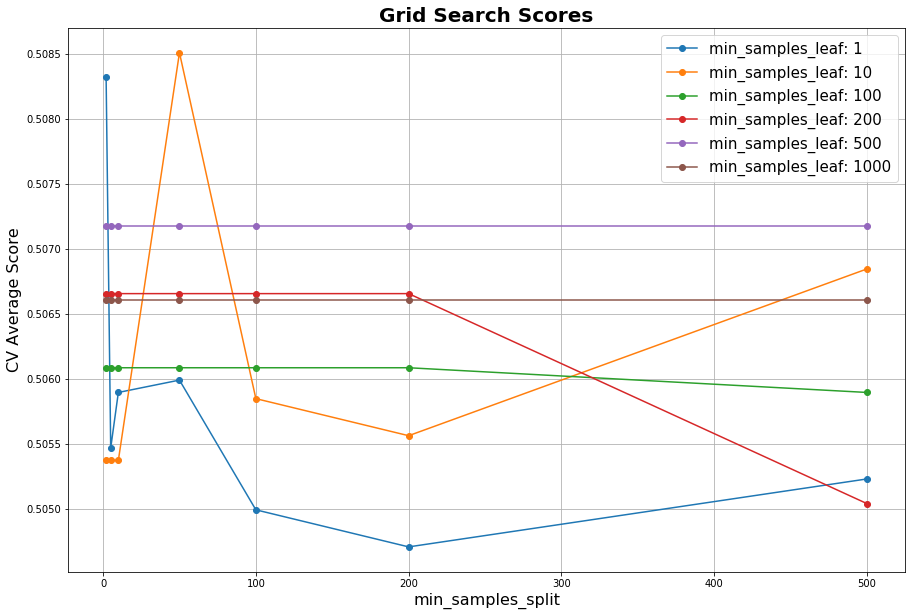

In [56]:
splits = [2,5,10,50,100,200,500]
leafs = [1,10,100,200,500,1000]

gd = GradientBoostingClassifier(random_state=0,max_depth = 3,
                                max_features ='sqrt' , 
                                n_estimators = 400)

clf = GridSearchCV(gd,
                   dict(min_samples_split = splits ,min_samples_leaf= leafs), 
                   cv=10,
                   n_jobs=-1,
                  scoring='accuracy', verbose=5).fit(X_train,Y_train)

# Calling Method 
plot_grid_search(clf.cv_results_, splits, leafs, 'min_samples_split', 'min_samples_leaf')

/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


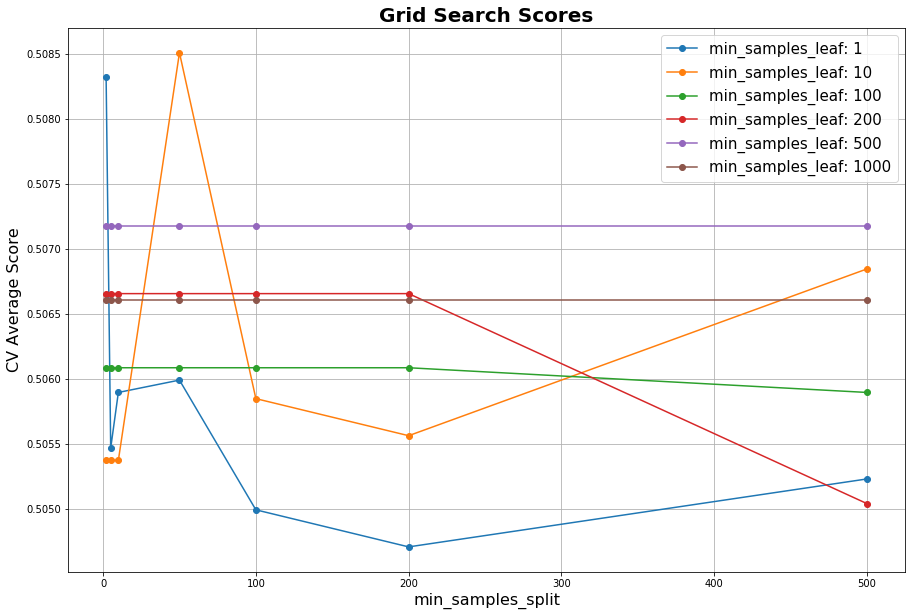

In [58]:
plot_grid_search(clf.cv_results_, splits, leafs, 'min_samples_split', 'min_samples_leaf')

In [57]:
clf.grid_scores_, clf.best_params_, clf.best_score_

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50832, std: 0.01098, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.50547, std: 0.01370, params: {'min_samples_leaf': 1, 'min_samples_split': 5},
  mean: 0.50589, std: 0.01176, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.50599, std: 0.01196, params: {'min_samples_leaf': 1, 'min_samples_split': 50},
  mean: 0.50499, std: 0.01253, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.50470, std: 0.01366, params: {'min_samples_leaf': 1, 'min_samples_split': 200},
  mean: 0.50523, std: 0.01107, params: {'min_samples_leaf': 1, 'min_samples_split': 500},
  mean: 0.50537, std: 0.01428, params: {'min_samples_leaf': 10, 'min_samples_split': 2},
  mean: 0.50537, std: 0.01428, params: {'min_samples_leaf': 10, 'min_samples_split': 5},
  mean: 0.50537, std: 0.01428, params: {'min_samples_leaf': 10, 'min_samples_split': 10},
  mean: 0.50851, std: 0.01556, params: {'min_samples_leaf': 10, 'min_samples_split': 50},
  mean: 0.50585, s

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=2 .........................
[CV] min_samples_leaf=1, min_samples_split=5 .........................
[CV] min_samples_leaf=1, min_samples_split=5 .........................
[CV]  min_samples_leaf=1, min_samples_split=2, score=0.5080798479087453, total= 1.2mi

[CV]  min_samples_leaf=1, min_samples_split=100, score=0.4995247148288973, total= 1.2min
[CV] min_samples_leaf=1, min_samples_split=200 .......................
[CV]  min_samples_leaf=1, min_samples_split=100, score=0.5019011406844106, total= 1.2min
[CV] min_samples_leaf=1, min_samples_split=200 .......................


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  5.2min


[CV]  min_samples_leaf=1, min_samples_split=200, score=0.5406175771971496, total= 1.2min
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.4845605700712589, total= 1.2min
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=100, score=0.5040418449833571, total= 1.2min
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.5026128266033254, total= 1.2min
[CV]  min_samples_leaf=1, min_samples_split=100, score=0.5002377555872562, total= 1.2min
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV] min_samples_leaf=1, min_samples_split=500 .......................
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.5083135391923991, total= 1.2min
[CV]  min_samples_leaf=1, min_samples_split=200, score=0.5133079847908745, total= 1.2min
[CV] min_samples_leaf=

[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.4916864608076009, total= 1.2min
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.49453681710213776, total= 1.3min
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.5102137767220902, total= 1.2min
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=10, score=0.5011887779362815, total= 1.3min
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.5080798479087453, total= 1.3min
[CV] min_samples_leaf=10, min_samples_split=100 ......................
[CV]  min_samples_leaf=10, min_samples_split=50, score=0.5061787072243346, total= 1.3min
[CV] min_samples_leaf=10, min_samples_s

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 15.4min


[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=10, min_samples_split=500, score=0.5002377555872562, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.5382422802850356, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.49453681710213776, total= 1.2min
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.49643705463182897, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.5168646080760095, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=5 .......................
[CV]  min_samples_leaf=100, min_samples_split=2, score=0.5090304182509505, total= 1.2min
[CV] min_samples_leaf=100, min_sample

[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5382422802850356, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.49643705463182897, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.49453681710213776, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5168646080760095, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5090304182509505, total= 1.2min
[CV] min_samples_leaf=100, min_samples_split=500 .....................
[CV]  min_samples_leaf=100, min_samples_split=200, score=0.5133079847908745, total= 1.2min
[CV] min_samples_leaf=100,

[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.4817102137767221, total= 1.1min
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.4950118764845606, total= 1.1min
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.5182897862232779, total= 1.1min
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.5061787072243346, total= 1.1min
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.5047528517110266, total= 1.1min
[CV] min_samples_leaf=200, min_samples_split=100 .....................
[CV]  min_samples_leaf=200, min_samples_split=50, score=0.49809885931558934, total= 1.1min
[CV] min_samples_leaf=200, min_sa

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 27.7min


[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5061787072243346, total= 1.2min
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5047528517110266, total= 1.2min
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.49809885931558934, total= 1.2min
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5190114068441065, total= 1.2min
[CV] min_samples_leaf=200, min_samples_split=500 .....................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5026153114598193, total= 1.2min
[CV] min_samples_leaf=500, min_samples_split=2 .......................
[CV]  min_samples_leaf=200, min_samples_split=200, score=0.5045173561578697, total= 1.2min
[CV] min_samples_leaf=500, min_samples_split=2 .......................
[CV]  min_samples_leaf=200,

[CV]  min_samples_leaf=500, min_samples_split=50, score=0.501425855513308, total= 1.2min
[CV] min_samples_leaf=500, min_samples_split=100 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.504277566539924, total= 1.2min
[CV] min_samples_leaf=500, min_samples_split=100 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.5064194008559201, total= 1.1min
[CV] min_samples_leaf=500, min_samples_split=100 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.5099809885931559, total= 1.2min
[CV] min_samples_leaf=500, min_samples_split=200 .....................
[CV]  min_samples_leaf=500, min_samples_split=50, score=0.4988112220637185, total= 1.1min
[CV] min_samples_leaf=500, min_samples_split=200 .....................
[CV]  min_samples_leaf=500, min_samples_split=100, score=0.53729216152019, total= 1.2min
[CV] min_samples_leaf=500, min_samples_split=200 .....................
[CV]  min_samples_leaf=500, min_sampl

[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.4995247148288973, total=  59.2s
[CV] min_samples_leaf=1000, min_samples_split=10 .....................
[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.5275665399239544, total=  59.0s
[CV] min_samples_leaf=1000, min_samples_split=10 .....................
[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.5087969567284831, total=  58.9s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_samples_split=5, score=0.4992867332382311, total=  59.0s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_samples_split=10, score=0.5311163895486936, total=  59.3s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min_samples_split=10, score=0.4855106888361045, total=  59.4s
[CV] min_samples_leaf=1000, min_samples_split=50 .....................
[CV]  min_samples_leaf=1000, min

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 42.0min finished
/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


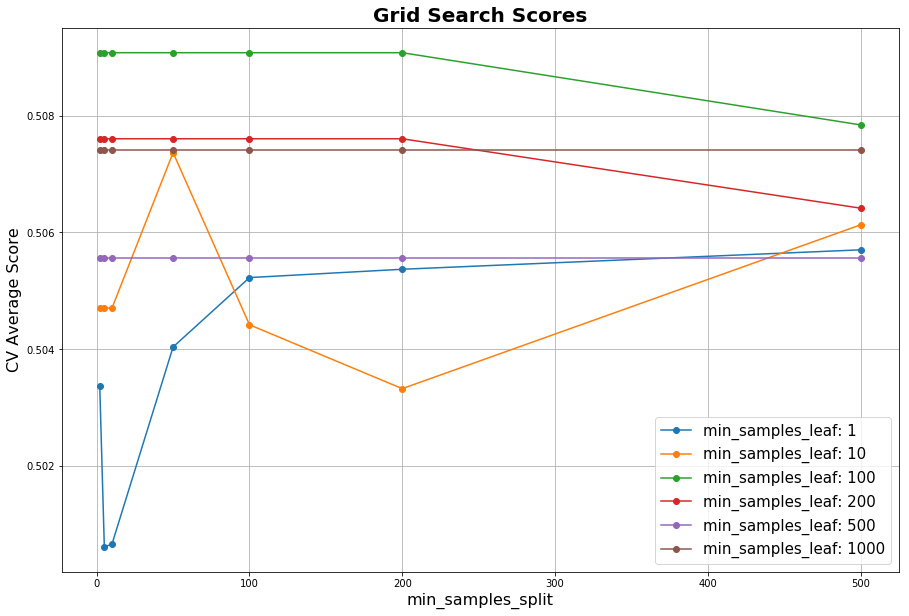

In [73]:
splits = [2,5,10,50,100,200,500]
leafs = [1,10,100,200,500,1000]

gd = GradientBoostingClassifier(random_state=0,max_depth = 4,
                                max_features ='sqrt' , 
                                n_estimators = 400)

clf = GridSearchCV(gd,
                   dict(min_samples_split = splits ,min_samples_leaf= leafs), 
                   cv=10,
                   n_jobs=-1,
                  scoring='accuracy', verbose=5).fit(X_train,Y_train)

# Calling Method 
plot_grid_search(clf.cv_results_, splits, leafs, 'min_samples_split', 'min_samples_leaf')

In [74]:
clf.grid_scores_, clf.best_params_, clf.best_score_

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50337, std: 0.01108, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.50062, std: 0.01446, params: {'min_samples_leaf': 1, 'min_samples_split': 5},
  mean: 0.50067, std: 0.01167, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.50404, std: 0.01631, params: {'min_samples_leaf': 1, 'min_samples_split': 50},
  mean: 0.50523, std: 0.01565, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.50537, std: 0.01551, params: {'min_samples_leaf': 1, 'min_samples_split': 200},
  mean: 0.50570, std: 0.01344, params: {'min_samples_leaf': 1, 'min_samples_split': 500},
  mean: 0.50470, std: 0.01378, params: {'min_samples_leaf': 10, 'min_samples_split': 2},
  mean: 0.50470, std: 0.01378, params: {'min_samples_leaf': 10, 'min_samples_split': 5},
  mean: 0.50470, std: 0.01378, params: {'min_samples_leaf': 10, 'min_samples_split': 10},
  mean: 0.50737, std: 0.00988, params: {'min_samples_leaf': 10, 'min_samples_split': 50},
  mean: 0.50442, s

<module 'matplotlib.pyplot' from '/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

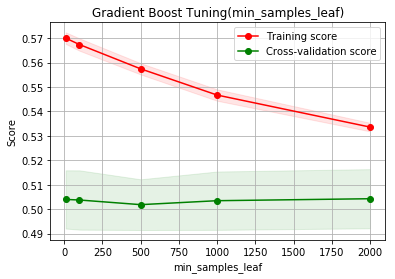

In [21]:
min_leafs = [10, 100, 500,1000,2000]
gb_lst_leaf = []
for leaf in min_leafs:
    gb_lst_leaf.append(GradientBoostingClassifier(min_samples_split = 100,
                                          min_samples_leaf = leaf, random_state=0))

param_tuning('min_samples_leaf',min_leafs,gb_lst_leaf,'Gradient Boost Tuning(min_samples_leaf)')

#### learning rate = 

training model1...
training model2...
training model3...
training model4...


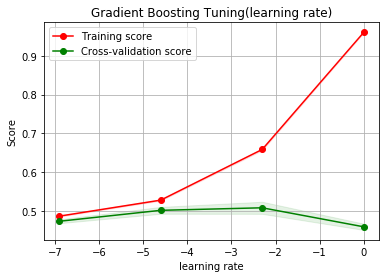

In [65]:
lrs = [0.001,0.01,0.1,1]
gb_lst = []
for lr in lrs:
    gb_lst.append(GradientBoostingClassifier(random_state=0,max_features = 'sqrt',
                                             learning_rate=lr,
                                             n_estimators = 400,
                                             min_samples_split = 50,
                                             min_samples_leaf = 10,
                                             max_depth = 3))

param_tuning('learning rate',np.log(lrs),gb_lst,'Gradient Boosting Tuning(learning rate)')
plt.show()

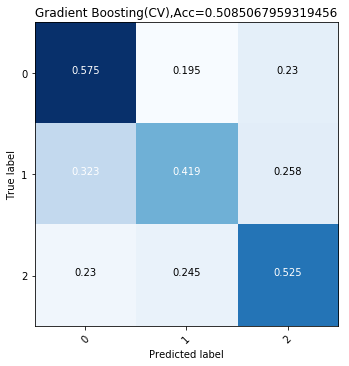

In [66]:
plot_confusion_matrix_cv('Gradient Boosting(CV)',X_train, Y_train,
                      GradientBoostingClassifier(random_state=0,max_features = 'sqrt',
                                             learning_rate=0.1,
                                             n_estimators = 400,
                                             min_samples_split = 50,
                                             min_samples_leaf = 10,
                                             max_depth = 3))

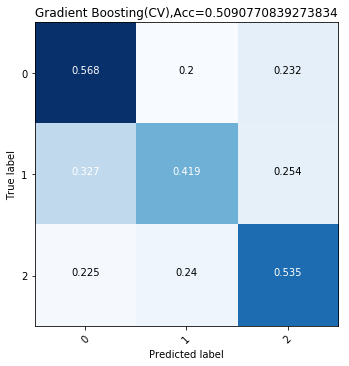

In [76]:
plot_confusion_matrix_cv('Gradient Boosting(CV)',X_train, Y_train,
                      GradientBoostingClassifier(random_state=0,max_features = 'sqrt',
                                             learning_rate=0.1,
                                             n_estimators = 400,
                                             min_samples_split = 2,
                                             min_samples_leaf = 100,
                                             max_depth = 4))

In [72]:
%timeit GradientBoostingClassifier(random_state=0,max_features = 'sqrt',learning_rate=0.1,n_estimators = 400,min_samples_split = 50,min_samples_leaf = 10,max_depth = 3).fit(X_train,Y_train)

20.5 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### min_samples_split

<module 'matplotlib.pyplot' from '/Users/carold/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

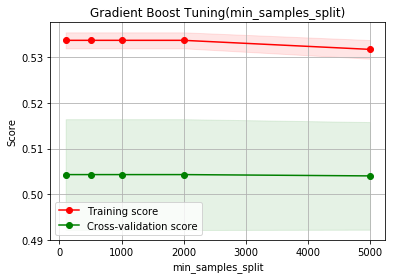

In [24]:
min_splits = [100,500,1000,2000,5000]
gb_lst_splits = []
for s in min_splits:
    gb_lst_splits.append(GradientBoostingClassifier(min_samples_split = s,
                                          min_samples_leaf = 2000, random_state=0))

param_tuning('min_samples_split',min_splits,gb_lst_splits,'Gradient Boost Tuning(min_samples_split)')

### 5. Ada Boosting

In [ ]:
def ada_tune():
    model_ada = AdaBoostClassifier().fit(X_train,Y_train)
    preds_ada = model_ada.predict(X_val)
#     plot_confusion_matrix(confusion_matrix(Y_val, preds_ada, labels=range(3)), classes=range(3), normalize=True,
#                       title='AdaBoostingClassifier')
    

## 6. MLP

/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training score:  0.8766327984022215
cv score:  0.4403093244145452


/Users/carold/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


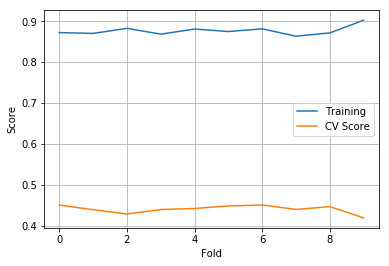

In [12]:
from sklearn.neural_network import MLPClassifier
cv_score(MLPClassifier())
plt.show()

In [ ]:
plot_learning_curve('MLP',MLPClassifier(),X_train,Y_train)
plt.show()

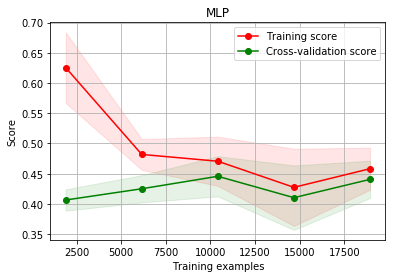

In [30]:
mlp = MLPClassifier(hidden_layer_sizes = 100,learning_rate = 'constant',
                    learning_rate_init=0.1,random_state = 0)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

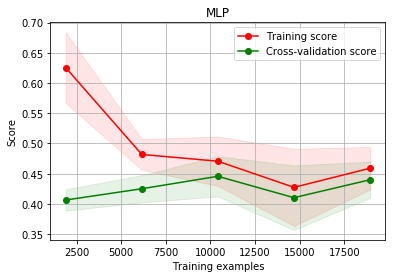

In [20]:
mlp = MLPClassifier(hidden_layer_sizes = 100,learning_rate = 'adaptive',
                    learning_rate_init=0.1,random_state = 0)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

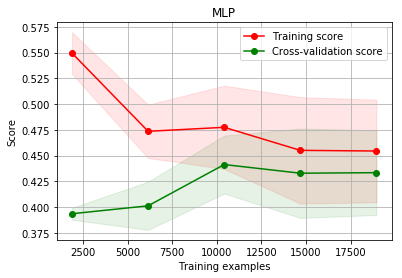

In [22]:
mlp = MLPClassifier(hidden_layer_sizes = 200,learning_rate = 'adaptive',
                    learning_rate_init=0.1,random_state = 0)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

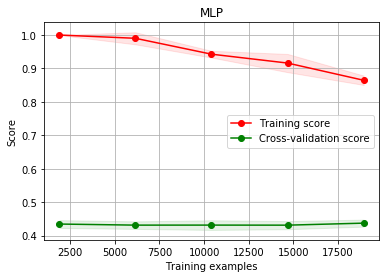

In [25]:
mlp = MLPClassifier(hidden_layer_sizes = 100,learning_rate = 'invscaling',
                    learning_rate_init=0.01,random_state = 0)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

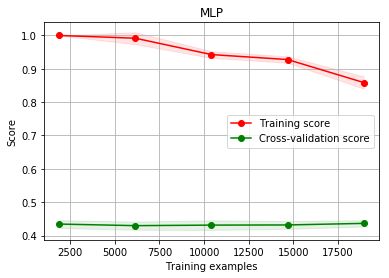

In [27]:
mlp = MLPClassifier(hidden_layer_sizes = 100,
                    learning_rate_init=0.01,random_state = 0)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

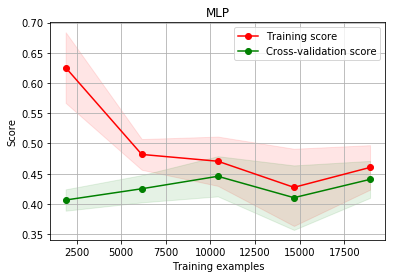

In [28]:
mlp = MLPClassifier(hidden_layer_sizes = 100,
                    learning_rate_init=0.1,random_state = 0,max_iter = 500)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

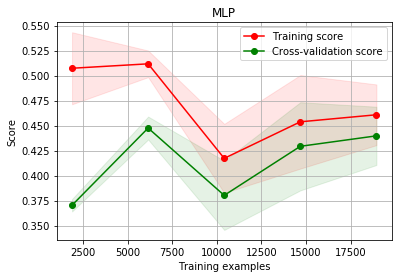

In [29]:
mlp = MLPClassifier(hidden_layer_sizes = 300,
                    learning_rate_init=0.1,random_state = 0,max_iter = 500)
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

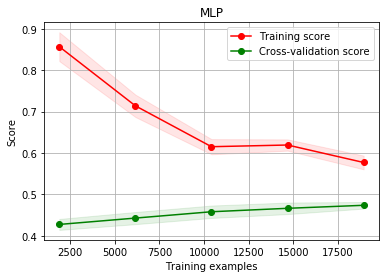

In [31]:
mlp = MLPClassifier(hidden_layer_sizes = 100,learning_rate = 'constant',
                    learning_rate_init=0.1,random_state = 0,activation = 'logistic')
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

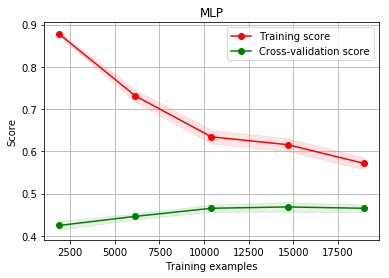

In [32]:
mlp = MLPClassifier(hidden_layer_sizes = 50,learning_rate = 'constant',
                    learning_rate_init=0.1,random_state = 0,activation = 'logistic')
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()

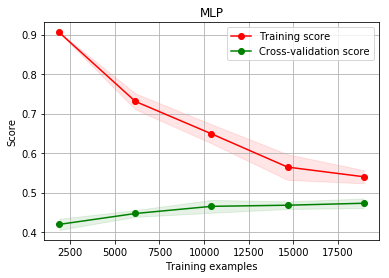

In [33]:
mlp = MLPClassifier(hidden_layer_sizes = 500,learning_rate = 'constant',
                    learning_rate_init=0.1,random_state = 0,activation = 'logistic')
plot_learning_curve('MLP',mlp,X_train,Y_train)
plt.show()